In [28]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

# Regression import
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import accuracy_score

# Configure code auto-completion
%config Completer.use_jedi = False

# Set working directory
os.chdir('/notebooks/ml project/')

In [29]:
data = pd.read_csv("new_csv.csv") 

In [30]:
# Define the feature vector by non-feature columns
x = (data.drop(["name", "album", "popularity"], axis=1))

# Define the label 
y = data["popularity"]

In [31]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [ ]:
n_and_mses = {}
for n in range(10, 1000, 10):
    # Initializing the Random Forest Regression model 
    model = RandomForestRegressor(n_estimators = n, random_state = 0)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train)

    # Predicting the target values of the test set
    y_pred = model.predict(x_test)

    # RMSE (Root Mean Square Error)
    mse = float(format((mean_squared_error(y_test, y_pred)), '.3f'))
    n_and_mses[n] = mse
    print("\nMSE: ", mse, "for n=", n)


MSE:  140.974 for n= 10

MSE:  130.887 for n= 20

MSE:  124.779 for n= 30

MSE:  118.992 for n= 40

MSE:  118.518 for n= 50

MSE:  117.373 for n= 60

MSE:  114.694 for n= 70

MSE:  116.005 for n= 80

MSE:  115.425 for n= 90

MSE:  114.584 for n= 100

MSE:  114.222 for n= 110

MSE:  114.169 for n= 120

MSE:  114.195 for n= 130

MSE:  114.063 for n= 140

MSE:  114.716 for n= 150

MSE:  114.967 for n= 160

MSE:  114.6 for n= 170

MSE:  114.112 for n= 180

MSE:  113.482 for n= 190

MSE:  113.374 for n= 200

MSE:  113.358 for n= 210

MSE:  113.294 for n= 220

MSE:  113.255 for n= 230

MSE:  113.396 for n= 240

MSE:  113.253 for n= 250

MSE:  112.527 for n= 260

MSE:  112.449 for n= 270

MSE:  111.942 for n= 280

MSE:  111.935 for n= 290

MSE:  111.84 for n= 300

MSE:  112.184 for n= 310

MSE:  112.227 for n= 320

MSE:  112.458 for n= 330

MSE:  112.383 for n= 340

MSE:  112.177 for n= 350

MSE:  112.289 for n= 360

MSE:  112.454 for n= 370

MSE:  112.133 for n= 380

MSE:  112.052 for n= 39

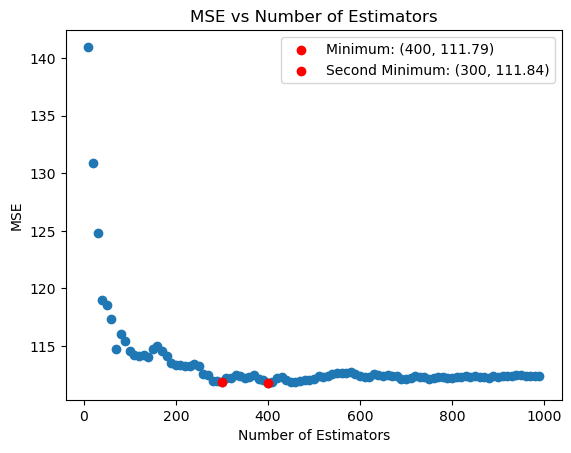

Minimum MSE: 111.79 at Number of Estimators = 400
Second Minimum MSE: 111.84 at Number of Estimators = 300


In [27]:
import matplotlib.pyplot as plt


# Extract keys and values from the dictionary
x_cord = list(n_and_mses.keys())
y_cord = list(n_and_mses.values())

# Find the minimum and second minimum MSE values along with their corresponding number of estimators
sorted_indices = sorted(range(len(y_cord)), key=lambda k: y_cord[k])
min_mse_idx, second_min_mse_idx = sorted_indices[:2]
min_mse = y_cord[min_mse_idx]
min_estimators = x_cord[min_mse_idx]
second_min_mse = y_cord[second_min_mse_idx]
second_min_estimators = x_cord[second_min_mse_idx]

# Create a scatter plot
plt.scatter(x_cord, y_cord)

# Highlight the minimum and second minimum points
plt.scatter(min_estimators, min_mse, color='red', label=f'Minimum: ({min_estimators}, {min_mse})')
plt.scatter(second_min_estimators, second_min_mse, color='red', label=f'Second Minimum: ({second_min_estimators}, {second_min_mse})')

# Set plot labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('MSE vs Number of Estimators')

# Show the plot with legend
plt.legend()
plt.show()

print(f"Minimum MSE: {min_mse} at Number of Estimators = {min_estimators}")
print(f"Second Minimum MSE: {second_min_mse} at Number of Estimators = {second_min_estimators}")